<a href="https://colab.research.google.com/github/Sxbxn/Data_Mining-Study/blob/main/K-means_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
url = 'https://raw.githubusercontent.com/Sxbxn/Data_Mining-Study/eb7b81fbd5f098a8f2d83e71c485340026d3169b/data/Iris.csv'
data = pd.read_csv(url)
x = data.iloc[:, [1, 2, 3, 4]].values

In [20]:
print(data)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


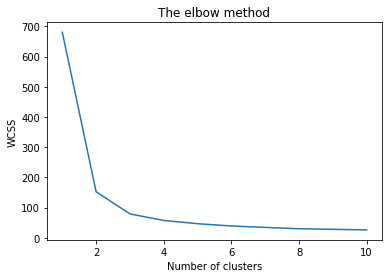

In [21]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(x)
data_scaled = pd.DataFrame(result)
data_scaled.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result, columns=["x", "y"])
result

,x,y
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [24]:
feature = result[['x','y']]

model = KMeans(n_clusters=3, algorithm='auto') # 3개를 cluster 데이터로 군집화
model.fit(feature)
predict = pd.DataFrame(model.predict(feature)) #feature에 대한 clustering value DataFrame
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1) # 두 DataFrame을 합침
r

,x,y,predict
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1
...,...,...,...
145,1.870522,0.382822,0
146,1.558492,-0.905314,2
147,1.520845,0.266795,0
148,1.376391,1.016362,0


In [25]:
from sklearn.metrics import silhouette_score
score = silhouette_score(feature, predict)
print(score)

0.5081546339481329


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


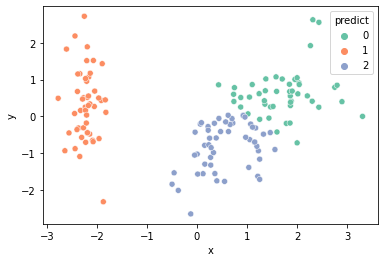

In [26]:
sns.scatterplot(x="x", y="y", hue="predict", data=r, palette="Set2");

In [27]:
feature = result[['x','y']]

model4 = KMeans(n_clusters=4, algorithm='auto') # 4개를 cluster 데이터로 군집화
model4.fit(feature)
predict = pd.DataFrame(model4.predict(feature)) #feature에 대한 clustering value DataFrame
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1) # 두 DataFrame을 합침
r

,x,y,predict
0,-2.264542,0.505704,3
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,3
...,...,...,...
145,1.870522,0.382822,0
146,1.558492,-0.905314,2
147,1.520845,0.266795,0
148,1.376391,1.016362,0


In [28]:
from sklearn.metrics import silhouette_score
score = silhouette_score(feature, predict)
print(score)

0.4453130023531033


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


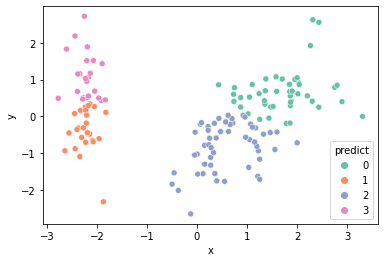

In [29]:
sns.scatterplot(x="x", y="y", hue="predict", data=r, palette="Set2");

In [30]:
feature = result[['x','y']]

model2 = KMeans(n_clusters=2, algorithm='auto') # 4개를 cluster 데이터로 군집화
model2.fit(feature)
predict = pd.DataFrame(model2.predict(feature)) #feature에 대한 clustering value DataFrame
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1) # 두 DataFrame을 합침
r

,x,y,predict
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0
...,...,...,...
145,1.870522,0.382822,1
146,1.558492,-0.905314,1
147,1.520845,0.266795,1
148,1.376391,1.016362,1


In [31]:
from sklearn.metrics import silhouette_score
score = silhouette_score(feature, predict)
print(score)

0.6130367695429764


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


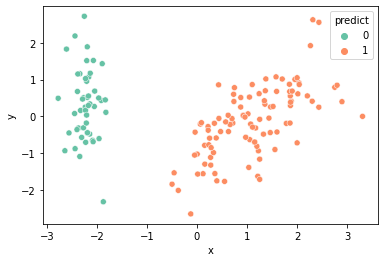

In [32]:
sns.scatterplot(x="x", y="y", hue="predict", data=r, palette="Set2");